# Identifying star clusters

### Requirements

In [1]:
import astroquery.gaia
from astropy.coordinates import SkyCoord
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import pyvo as vo 

Status messages could not be retrieved


## Data pre-processing

### Downloading data gaia

In [16]:

#liczba gwiazd które chcemy pobrać
num_stars = 10

#tworzenie zapyatania do pobierania najbliższych gwiazd w ADQL(SQL dla astronomi)
query = f"""SELECT TOP {num_stars} dr3.ra, dr3.dec, dr3.phot_g_mean_mag, dr3.distance_gspphot
FROM gaiadr3.gaia_source as dr3
ORDER BY dr3.distance_gspphot ASC
"""
job = astroquery.gaia.Gaia.launch_job(query)
#tabelka z danymi gwiazd

table = job.get_results()


TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

### Downloading data - alteratively

In [16]:

TAP_URL = "http://tapvizier.u-strasbg.fr/TAPVizieR/tap"

tap_service = vo.dal.TAPService(TAP_URL)

num_stars = 100


query = f"""
SELECT TOP {num_stars}
    RA_ICRS  AS ra,
    DE_ICRS  AS dec,
    GMAG     AS phot_g_mean_mag,
    Dist     AS distance_gspphot
FROM "I/355/paramp"
WHERE Dist IS NOT NULL
"""

result = tap_service.search(query)

df = result.to_table().to_pandas()
print(df.head())

          ra        dec  phot_g_mean_mag  distance_gspphot
0  35.626802  80.797563           6.3328          547.6937
1  35.683998  80.800618           6.9611         2524.9910
2  35.735647  80.800546           5.7155         1672.6501
3  35.647788  80.801217           8.7494          332.9262
4  35.414879  80.803325           7.4741         1603.9740


### Creating SkyCord object

In [17]:
#tworzenie obiektu SkyCord dla gaia
#gwiazdy = SkyCoord(df["ra"], df["dec"])

# dla tych innych 
gwiazdy = SkyCoord(
    df["ra"].values,
    df["dec"].values,
    unit="deg",
    frame="icrs"
)

### Transforming the coordinate system of our data from astronomical to Cartesian space

In [18]:
#zamiana współrzędnych na kartezjanskie
gwiazdy_cart = gwiazdy.represent_as("cartesian")

### Creating DataFrame

In [19]:

# tworzenie DataFrame z odzielnymi kolumnami x,y,z
df = pd.DataFrame({
    'x': gwiazdy_cart.x.value,
    'y': gwiazdy_cart.y.value,
    'z': gwiazdy_cart.z.value
})

## Data Visualization

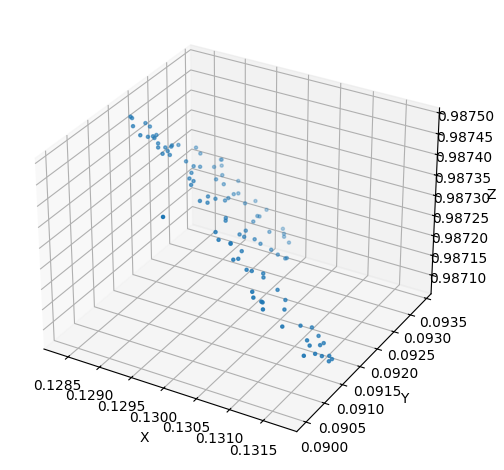

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["x"], df["y"], df["z"], s=5)  

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.tight_layout()
plt.show()